In [1]:
def model_persistence(x):
    return x

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
predictions = []

In [4]:
from pandas import read_csv

In [5]:
from pandas import datetime

In [6]:
from matplotlib import pyplot

In [7]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [8]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

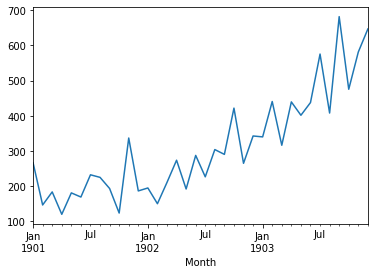

In [9]:
series.plot()

In [10]:
pyplot.show()

In [11]:
from pandas import DataFrame

In [12]:
import pandas as pd

In [13]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [14]:
values = DataFrame(series.values)

In [15]:
dataframe = pd.concat([values.shift(1), values], axis=1)

In [16]:
series.values

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [17]:
dataframe.columns = ['t-1', 't+1']

In [18]:
print(dataframe.head(5))

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [19]:
X = dataframe.values
X

array([[  nan, 266. ],
       [266. , 145.9],
       [145.9, 183.1],
       [183.1, 119.3],
       [119.3, 180.3],
       [180.3, 168.5],
       [168.5, 231.8],
       [231.8, 224.5],
       [224.5, 192.8],
       [192.8, 122.9],
       [122.9, 336.5],
       [336.5, 185.9],
       [185.9, 194.3],
       [194.3, 149.5],
       [149.5, 210.1],
       [210.1, 273.3],
       [273.3, 191.4],
       [191.4, 287. ],
       [287. , 226. ],
       [226. , 303.6],
       [303.6, 289.9],
       [289.9, 421.6],
       [421.6, 264.5],
       [264.5, 342.3],
       [342.3, 339.7],
       [339.7, 440.4],
       [440.4, 315.9],
       [315.9, 439.3],
       [439.3, 401.3],
       [401.3, 437.4],
       [437.4, 575.5],
       [575.5, 407.6],
       [407.6, 682. ],
       [682. , 475.3],
       [475.3, 581.3],
       [581.3, 646.9]])

In [20]:
train_size = int(len(X) * 0.66)
train_size

23

In [21]:
train, test = X[1:train_size], X[train_size:]

In [22]:
train_X, train_y = train[:, 0], train[:, 1]

In [23]:
test_X, test_y = test[:, 0], test[:, 1]

#walk-forward validation

In [24]:
predictions = list()

In [25]:
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

In [26]:
test_score = mean_squared_error(test_y, predictions)

In [27]:
print('Test MSE: %.3f' % test_score)

Test MSE: 17730.518


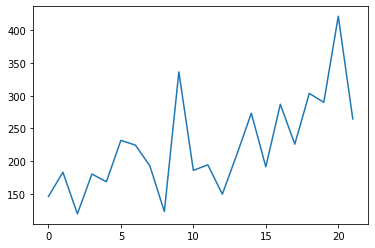

In [28]:
pyplot.plot(train_y)

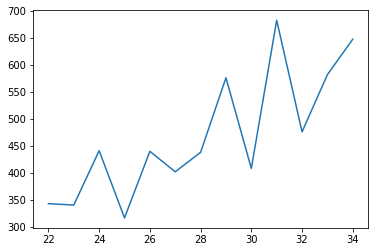

In [29]:
pyplot.plot([None for i in train_y] + [x for x in test_y])

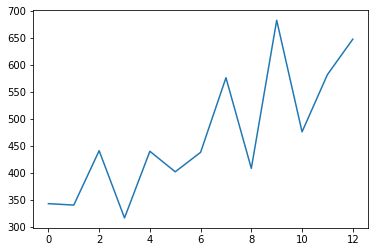

In [30]:
pyplot.plot([x for x in test_y])

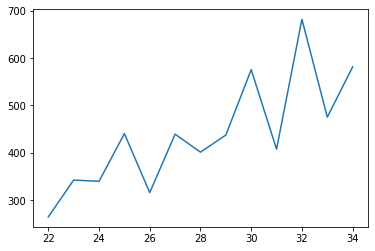

In [31]:
pyplot.plot([None for i in train_y] + [x for x in predictions])

In [32]:
pyplot.show()